In [ ]:
import torch
import torchvision

import torchvision.transforms as transforms

import torch.optim as optim
import torch.nn as nn

print("GPU available: {}".format(torch.cuda.is_available()))

GPU available: True


In [ ]:
if torch.cuda.is_available():
  device= "cuda:0"
else:
  device= "cpu"

#device = torch.device(device)

## Transformation
### Pipeline to perform series of operations on an image

In [ ]:
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.5, ), (0.5, ))
])

In [ ]:
trainset = torchvision.datasets.MNIST(
    'mnist',
     train = True,
     download = True,
     transform = transform
)
testset = torchvision.datasets.MNIST(
    'mnist',
    train = False,
    download = True,
    transform = transform
)

100%|██████████| 9912422/9912422 [00:00<00:00, 338255916.79it/s]

Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 31894600.80it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 85584241.62it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22151777.64it/s]


Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [ ]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [ ]:
print(trainset.data[0].shape)
print(trainset.data[0])

torch.Size([28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,  

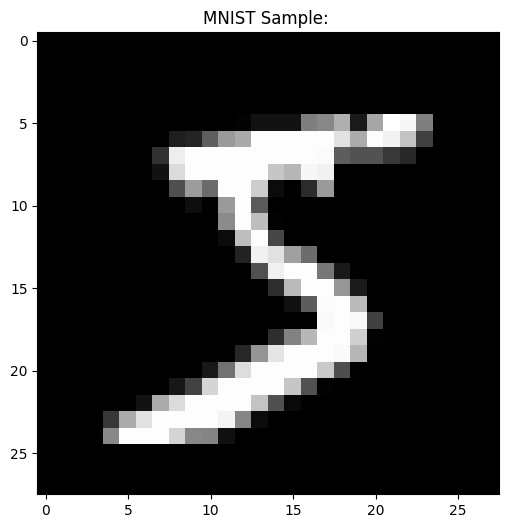

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imgshow(title="", image = None, size = 6):
  w, h = image.shape[1], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(size* aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

image= trainset.data[0].numpy()
imgshow("MNIST Sample: ", image)


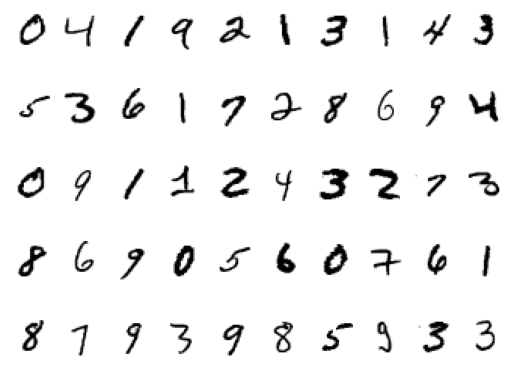

In [ ]:
# To show the images from the dataset

figure = plt.figure()
num_of_images = 50
for index in range (1, num_of_images+1):
  plt.subplot(5, 10, index)
  plt.axis('off')
  plt.imshow(trainset.data[index], cmap= 'gray_r')

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 128, shuffle= False, num_workers = 0)
testloader = torch.utils.data.DataLoader(testset, batch_size = 128, shuffle= False, num_workers = 0)

In [ ]:
 dataiter = iter(trainloader)
 images, labels = next(dataiter)

 print(images.shape)
 print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [ ]:
images[0].shape

torch.Size([1, 28, 28])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(64*12*12, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 64*12*12) # flattening
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [ ]:
epochs = 20
epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(epochs):
  print(f'Starting Epoch: {epoch +1}')
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = net(inputs)

    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i%50 == 49:
      correct = 0
      total = 0
      with torch.no_grad():
        for data in testloader:
          images, labels = data
          images = images.to(device)
          labels = labels.to(device)

          outputs = net(images)
          _,predicted = torch.max(outputs.data, dim= 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
        accuracy = 100*correct/total
        epoch_num = epoch + 1
        actual_loss = running_loss/50
        print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss:{actual_loss: .3f}, Test Accuracy= {accuracy:.3f}%')
        running_loss = 0.0

  epoch_log.append(epoch_num)
  loss_log.append(actual_loss)
  accuracy_log.append(accuracy)
print('Finished Training')




Starting Epoch: 1
Epoch: 1, Mini-Batches Completed: 50, Loss: 0.060, Test Accuracy= 97.960%
Epoch: 1, Mini-Batches Completed: 100, Loss: 0.062, Test Accuracy= 97.900%
Epoch: 1, Mini-Batches Completed: 150, Loss: 0.060, Test Accuracy= 98.050%
Epoch: 1, Mini-Batches Completed: 200, Loss: 0.055, Test Accuracy= 98.070%
Epoch: 1, Mini-Batches Completed: 250, Loss: 0.065, Test Accuracy= 97.990%
Epoch: 1, Mini-Batches Completed: 300, Loss: 0.062, Test Accuracy= 98.100%
Epoch: 1, Mini-Batches Completed: 350, Loss: 0.058, Test Accuracy= 98.190%
Epoch: 1, Mini-Batches Completed: 400, Loss: 0.067, Test Accuracy= 98.040%
Epoch: 1, Mini-Batches Completed: 450, Loss: 0.053, Test Accuracy= 98.140%
Starting Epoch: 2
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.055, Test Accuracy= 98.050%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.056, Test Accuracy= 98.000%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.055, Test Accuracy= 98.170%
Epoch: 2, Mini-Batches Completed: 200, Loss: 0.049, Test Accuracy=

In [ ]:
PATH = './mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

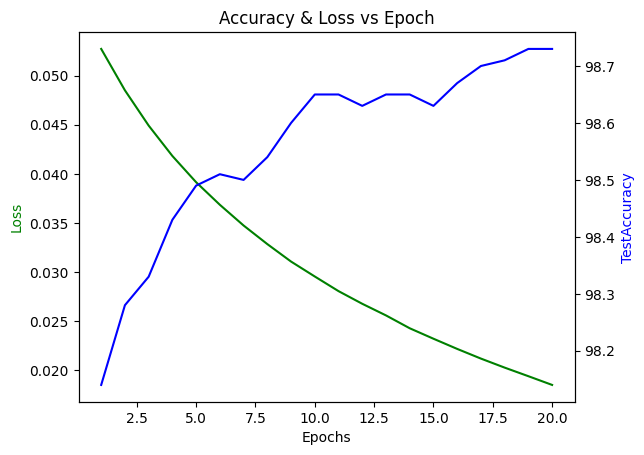

In [ ]:
fig, ax1 = plt.subplots()
plt.title("Accuracy & Loss vs Epoch")
plt.xticks(rotation = 0)
ax2 = ax1.twinx()
ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color = 'g')
ax2.set_ylabel('TestAccuracy', color = 'b')
plt.show()